### Data Analysis of Detector-1 dataset

In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data_Files/Processsed data/det1.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
df.head()

,TIME,AMP,HV,LLD,COUNT
0,10.0,1.2,701.000000,0.6,546.300000
1,10.0,1.2,750.000000,0.6,223.633333
2,10.0,1.2,800.066667,0.6,227.233333
3,10.0,1.2,850.000000,0.6,209.300000
4,10.0,1.2,900.000000,0.6,251.266667


### Plotting Histograms to identify the ranges of measurement of each variable

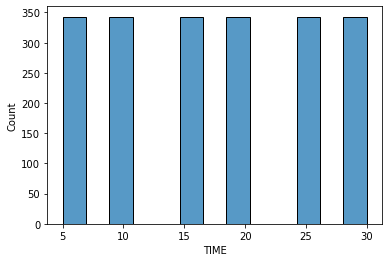

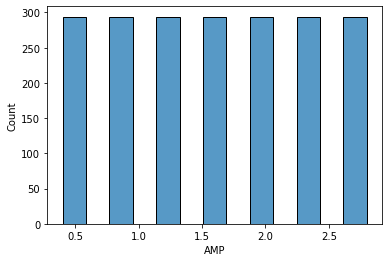

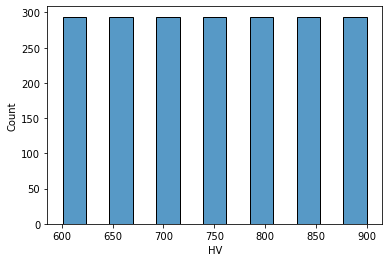

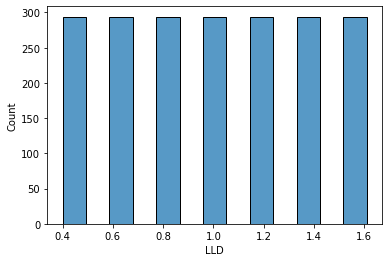

<Figure size 432x288 with 0 Axes>

In [3]:
for col in df.columns:
    plt.figure()
    if col!='COUNT':
        sns.histplot(df[col])

### KDE plot for COUNT variable

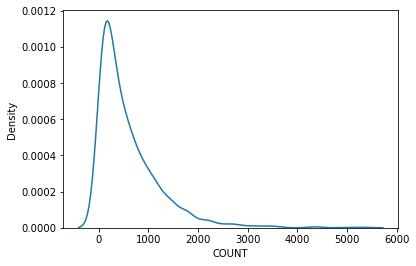

In [4]:
sns.distplot(df['COUNT'],hist=False)
plt.plot()
plt.show()

### Evaluating correlations using Spearman correlations 

In [5]:
cols = ['TIME','AMP','HV','LLD']
for col in cols:
    coef, p = spearmanr(df[col], df['COUNT']) # spearman() correlation
    #coef, p = kendalltau(df[col], df['COUNT']) # alternatively: kendalltau() correlation
    print('correlation coefficient for {0} is : {1:.4}'.format(col,coef))
    alpha = 0.05
    if p > alpha:
        print('{0} and COUNT are uncorrelated with p value {1:.4}'.format(col,p))
    else:
        print('{0} and COUNT are correlated with p value {1:.4}'.format(col,p))
    print('\n')

correlation coefficient for TIME is : 0.5064
TIME and COUNT are correlated with p value 1.733e-134


correlation coefficient for AMP is : -0.326
AMP and COUNT are correlated with p value 3.66e-52


correlation coefficient for HV is : -0.5005
HV and COUNT are correlated with p value 6.224e-131


correlation coefficient for LLD is : -0.0118
LLD and COUNT are uncorrelated with p value 0.5926




<AxesSubplot:xlabel='COUNT'>

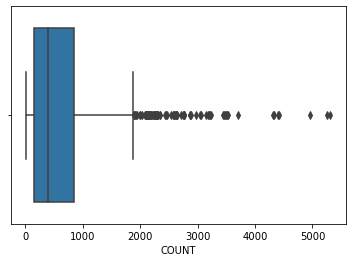

In [6]:
sns.boxplot(df['COUNT'])

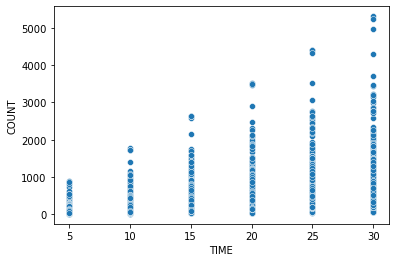

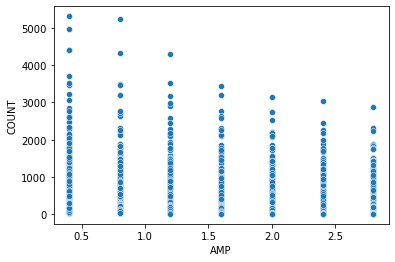

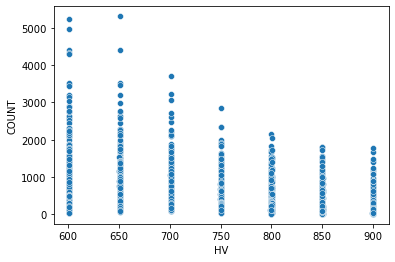

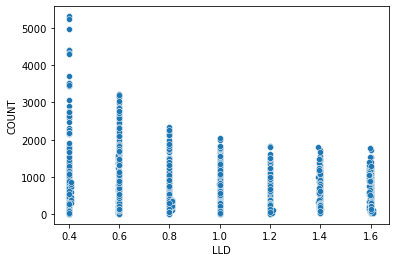

<Figure size 432x288 with 0 Axes>

In [7]:
for col in df.columns:
    plt.figure()
    if col!='COUNT':
        sns.scatterplot(df[col],df['COUNT'])